## Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/sophielee/Documents/movie_metadata.csv")

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## Data Cleansing

In [6]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [7]:
df.color.replace(to_replace=['Color', ' Black and White'], value=[0, 1], inplace=True)

In [8]:
df['color'] = df['color'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null float64
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non

In [10]:
# Filtering the data so it only includes the integers and floats

df = df.select_dtypes(include=['float64', 'int64', 'int'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 17 columns):
color                        5024 non-null float64
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
facenumber_in_poster         5030 non-null float64
num_user_for_reviews         5022 non-null float64
budget                       4551 non-null float64
title_year                   4935 non-null float64
actor_2_facebook_likes       5030 non-null float64
imdb_score                   5043 non-null float64
aspect_ratio                 4714 non-null float64
movie_facebook_likes         5043 non-null int64
dtypes: float64(14), int64(3)
me

In [12]:
# Dropping the null values and turning all features into the float format to make analysis easier

df = df.dropna().astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 5042
Data columns (total 17 columns):
color                        3800 non-null float64
num_critic_for_reviews       3800 non-null float64
duration                     3800 non-null float64
director_facebook_likes      3800 non-null float64
actor_3_facebook_likes       3800 non-null float64
actor_1_facebook_likes       3800 non-null float64
gross                        3800 non-null float64
num_voted_users              3800 non-null float64
cast_total_facebook_likes    3800 non-null float64
facenumber_in_poster         3800 non-null float64
num_user_for_reviews         3800 non-null float64
budget                       3800 non-null float64
title_year                   3800 non-null float64
actor_2_facebook_likes       3800 non-null float64
imdb_score                   3800 non-null float64
aspect_ratio                 3800 non-null float64
movie_facebook_likes         3800 non-null float64
dtypes: float64(17)
memory

## Exploratory Data Analysis

Text(0.5, 0, 'IMDB Ratings')

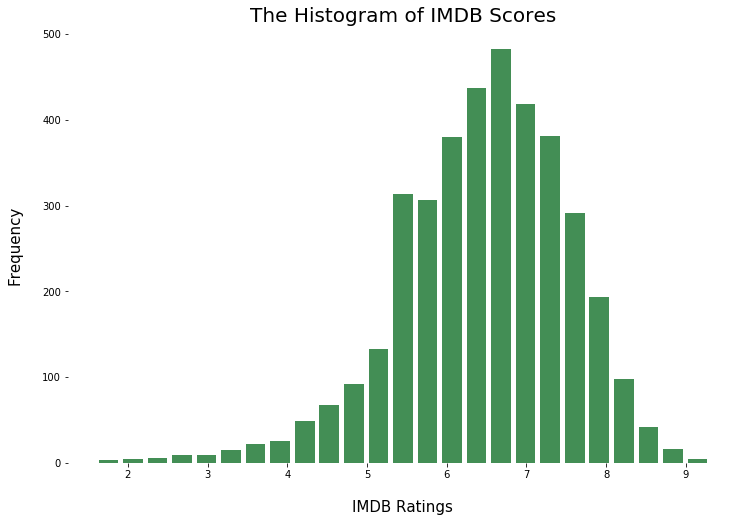

In [14]:
# Histogram of Movie Ratings

histplot = df.hist(column='imdb_score', bins=25, grid=False, figsize=(12,8), color='#438E55',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.title('The Histogram of IMDB Scores', size=20)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('IMDB Ratings', size=15, labelpad=20)

The histogram shows most ratings fall between 6 and 7.5. High ratings (8 to 10) are rare

Text(0.5, 0, 'IMDB Ratings')

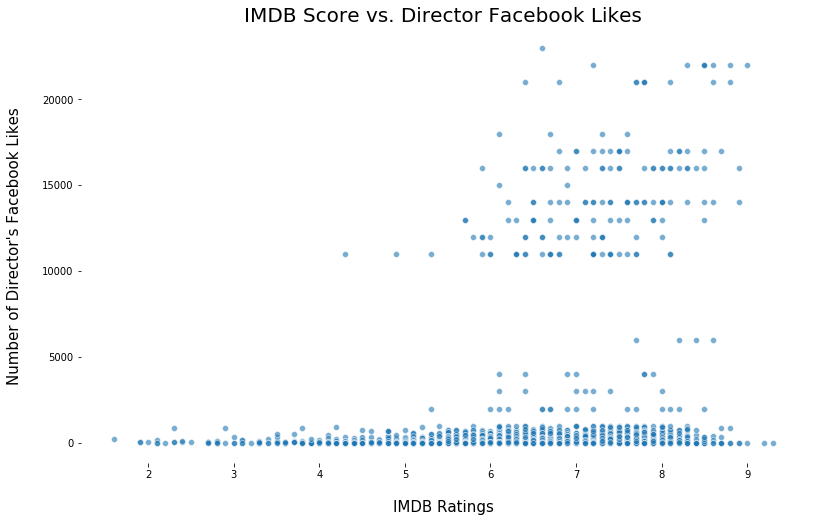

In [15]:
plt.figure(figsize=(13,8))

sns.scatterplot(x='imdb_score', y='director_facebook_likes', data=df, alpha=0.6)
sns.despine(left=True, bottom=True)

plt.title("IMDB Score vs. Director Facebook Likes", size=20)
plt.ylabel("Number of Director's Facebook Likes", size=15, labelpad=20)
plt.xlabel("IMDB Ratings", size=15, labelpad=20)

There is a high correlation between the ratings and the number of facebook likes of a director. The higher the IMDB ratings the higher the number of the facebook likes of the driector. This indicates the IMDB score can be biased and influenced by the popularity of the director

Text(0.5, 0, 'IMDB Ratings')

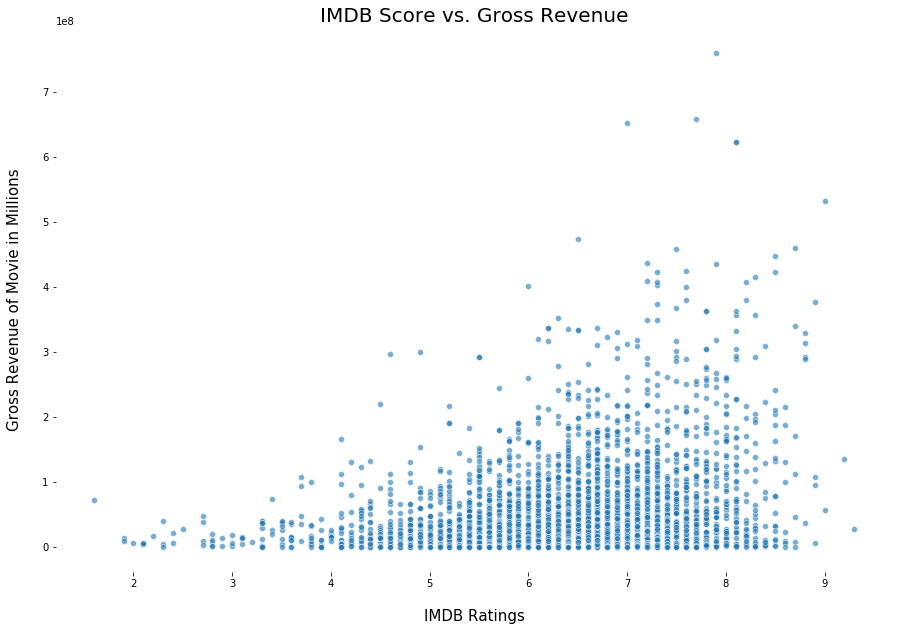

In [22]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='imdb_score', y='gross', data=df, alpha=0.6)
sns.despine(left=True, bottom=True)

plt.title('IMDB Score vs. Gross Revenue', size=20)
plt.ylabel('Gross Revenue of Movie in Millions', size=15, labelpad=20)
plt.xlabel('IMDB Ratings', size=15, labelpad=20)

The higher the revenue of the movie, the higher the ratings of the moive. Not all blockbusters are rated highly for the artistic merit of the movie. However, how well a movie performs commercially in the theatre seems to be a good indicator of the rating of the movie

Text(0.5, 0, 'Year')

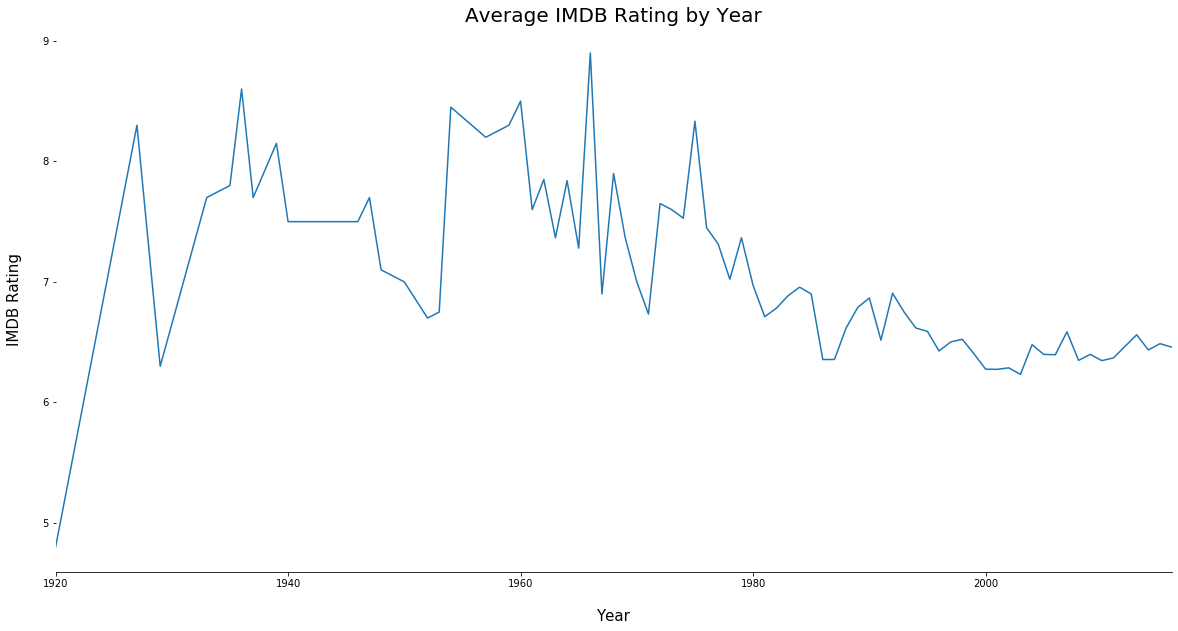

In [23]:
plt.figure(figsize=(20,10))
avg_score = df.groupby('title_year')['imdb_score'].agg('mean')
avg_score.plot()

sns.despine(left=True)

plt.title('Average IMDB Rating by Year', size=20)
plt.ylabel('IMDB Rating', size=15, labelpad=20)
plt.xlabel('Year', size=15, labelpad=20)

The movie ratings are generally higher in the early years (1920-1970). The average ratings are below 7 for movies produced after the 1980s. This shows that the voters on the IMDB are more inclined to give high ratings on older movies indicating bias in the IMDB reviewers

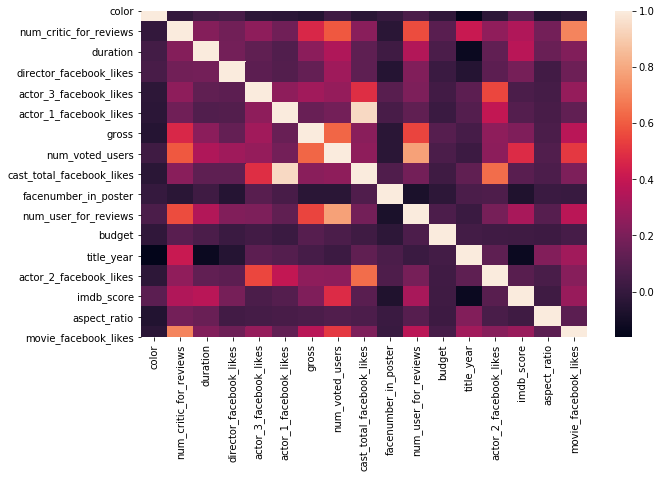

In [24]:
# Generating a heatmap to see which factors are correlated

plt.figure(figsize=(10,6))
correlation = df.corr()
sns.heatmap(correlation)

There are some obvious observations from the heatmap. For example, the number of likes on the main actor's Faceboo page is highly correlated with the total nuber of the likes of the cast's Facebook pages

In [25]:
correlation_matrix = df.corr()
correlation_matrix['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.477892
duration                     0.366108
num_critic_for_reviews       0.343841
num_user_for_reviews         0.322483
movie_facebook_likes         0.279450
gross                        0.212076
director_facebook_likes      0.190821
color                        0.113998
cast_total_facebook_likes    0.106221
actor_2_facebook_likes       0.102035
actor_1_facebook_likes       0.093096
actor_3_facebook_likes       0.064960
budget                       0.029025
aspect_ratio                 0.028518
facenumber_in_poster        -0.064359
title_year                  -0.129205
Name: imdb_score, dtype: float64

The correlation matrix reveals that the IMDB score is closely related to the number of voted users, the duration of the movie, and the number of likes on the movie's Facebook page. As suspected, the higher the popularity of the movie, the higher the movie rating on IMDB

## Feature Selection

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 5042
Data columns (total 17 columns):
color                        3800 non-null float64
num_critic_for_reviews       3800 non-null float64
duration                     3800 non-null float64
director_facebook_likes      3800 non-null float64
actor_3_facebook_likes       3800 non-null float64
actor_1_facebook_likes       3800 non-null float64
gross                        3800 non-null float64
num_voted_users              3800 non-null float64
cast_total_facebook_likes    3800 non-null float64
facenumber_in_poster         3800 non-null float64
num_user_for_reviews         3800 non-null float64
budget                       3800 non-null float64
title_year                   3800 non-null float64
actor_2_facebook_likes       3800 non-null float64
imdb_score                   3800 non-null float64
aspect_ratio                 3800 non-null float64
movie_facebook_likes         3800 non-null float64
dtypes: float64(17)
memory

We need to remove certain features that should not be part of our algorithm as they could affect the performance of the model. The following features: the aspect ratio, the number of faces in a movie's poster should not be part of the analysis as they are irrelevant

In [27]:
df.drop(['aspect_ratio', 'facenumber_in_poster'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 5042
Data columns (total 15 columns):
color                        3800 non-null float64
num_critic_for_reviews       3800 non-null float64
duration                     3800 non-null float64
director_facebook_likes      3800 non-null float64
actor_3_facebook_likes       3800 non-null float64
actor_1_facebook_likes       3800 non-null float64
gross                        3800 non-null float64
num_voted_users              3800 non-null float64
cast_total_facebook_likes    3800 non-null float64
num_user_for_reviews         3800 non-null float64
budget                       3800 non-null float64
title_year                   3800 non-null float64
actor_2_facebook_likes       3800 non-null float64
imdb_score                   3800 non-null float64
movie_facebook_likes         3800 non-null float64
dtypes: float64(15)
memory usage: 475.0 KB


In [28]:
# Distributing the dataset into 2 components: X and y

X = df.drop('imdb_score', axis=1).values
y = df['imdb_score'].values

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
# Splitting the dataset into training and test sets, with the test set equal to 20% and training set equal to 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Building a linear regression model with the training set

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred = linreg.predict(X_test)

In [36]:
from sklearn import metrics

In [37]:
# Evaluating the model with the R^2 score

linreg.score(X_test, y_test)

0.35557250646565486

The R^2 score of 0.36 indicates that the linear regression is not a good algorithm to predict the IMDB rating

In [38]:
# Building a random forest model

from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(n_estimators=100, random_state=0)
randomforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [39]:
randomforest.score(X_test, y_test)

0.5607459653033973

The random forest regressor performed far better than the linear regression algorithm at R^2 score of 0.56. This indicates that 56% of the time we can predict the movie rating based on the features used above

In [41]:
# Building a decision tree model

from sklearn.tree import DecisionTreeRegressor

decisiontree = DecisionTreeRegressor(max_depth=5, random_state=0)
decisiontree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [42]:
decisiontree.score(X_test, y_test)

0.34210102284807575

The decision tree model gave the R^2 score of 0.34 which indicates that it's not good at predicting the rating